In [1]:
%matplotlib inline

import os, subprocess, tarfile
from glob import glob
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy
import cartopy.crs as ccrs
from xhistogram.xarray import histogram

import warnings
warnings.filterwarnings('ignore')

seconds_per_day=60.*60.*24.
seconds_per_year=365.*seconds_per_day
carbon_molar_mass=12.011
cobalt_n_2_c = 106./16.

In [2]:
path_root='/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT'

control,machine_target='OM4p5_CORE2_IAF_gzCOBALT-Control-062321','gfdl.ncrc4-intel16-prod'
case,machine_target='OM4p5_CORE2_IAF_gzCOBALT-013022','gfdl.ncrc4-intel19-prod'

In [3]:
short_casename=case.replace('OM4p5_CORE2_IAF_','')
if short_casename=="gzCOBALT-013022":
    fig_casename='ms_gzCOBALT'
else:
    fig_casename=short_casename
print(short_casename, fig_casename)

gzCOBALT-013022 ms_gzCOBALT


In [4]:
phyto_varlist = ['di', 'smp', 'lgp']
zoo_varlist = ['smz', 'mdz', 'lgz', 'smt', 'lgt']

In [5]:
tmpdir = '/work/Jessica.Luo/tmp/'+case
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)
    print('created directory: '+tmpdir)
else:
    print('temporary directory exists: '+tmpdir)

temporary directory exists: /work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022


In [6]:
# read in files
diagTypes = ['ocean_cobalt_omip_tracers_month_z', 'ocean_cobalt_omip_2d', \
             'ocean_cobalt_fluxes_int', 'ocean_cobalt_fdet_100', 'ocean_cobalt_tracers_int'] 

pp_dates='1988-2007'
#pp_dates='1968-1972'

files=[glob(tmpdir + '/'+ d + '.' + pp_dates + '*.nc') for d in diagTypes]

files=sorted([f for fi in files for f in fi]) # nested list comprehension
#print(files)

In [7]:
if not files:
    pp_path=os.path.join(path_root, case, machine_target, 'pp')
    
    files=[glob(pp_path + '/' + d + '/av/monthly_5yr/' + d + '.' + pp_dates + '*.nc') for d in diagTypes]
    
    files=sorted([f for fi in files for f in fi]) # nested list comprehension
    print(files)


In [8]:
grid_file=os.path.join(path_root, case, machine_target, 'pp')+'/ocean_annual/ocean_annual.static.nc'
ds=xr.open_mfdataset(files, combine='by_coords')
grid=xr.open_dataset(grid_file)

In [9]:
grid_file

'/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT/OM4p5_CORE2_IAF_gzCOBALT-013022/gfdl.ncrc4-intel19-prod/pp/ocean_annual/ocean_annual.static.nc'

In [10]:
tmpdir = '/work/Jessica.Luo/tmp/'+control
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)
    print('created directory: '+tmpdir)
else:
    print('temporary directory exists: '+tmpdir)
    
# read in files
diagTypes = ['ocean_cobalt_omip_tracers_month_z', 'ocean_cobalt_omip_2d', \
             'ocean_cobalt_fluxes_int', 'ocean_cobalt_fdet_100', 'ocean_cobalt_tracers_int'] 

pp_dates='1988-2007'
#pp_dates='1993-1997'

c_files=[glob(tmpdir + '/'+ d + '.' + pp_dates + '*.nc') for d in diagTypes]

c_files=sorted([f for fi in c_files for f in fi]) # nested list comprehension
print(c_files)

if not c_files:
    pp_path=os.path.join(path_root, control, machine_target, 'pp')
    
    c_files=[glob(pp_path + '/' + d + '/av/monthly_5yr/' + d + '.' + pp_dates + '*.nc') for d in diagTypes]
    
    c_files=sorted([f for fi in c_files for f in fi]) # nested list comprehension
    #print(files)


temporary directory exists: /work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321
['/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.01.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.02.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.03.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.04.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.05.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.06.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.07.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.08.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.

In [11]:
dc=xr.open_mfdataset(c_files, combine='by_coords')

In [12]:
ds['depth_levels']=xr.DataArray(ds.z_i.diff(dim='z_i').values, coords={'z_l':ds.z_l.values}, dims=['z_l'], attrs={'long_name':'Thickness of depth bin', 'units':'meters'})
ds.depth_levels

<xarray.DataArray 'depth_levels' (z_l: 35)>
array([  5. ,  10. ,  10. ,  15. ,  22.5,  25. ,  25. ,  25. ,  37.5,
        50. ,  50. ,  75. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 175. , 250. , 375. , 500. ,
       500. , 500. , 500. , 500. , 500. , 500. , 500. , 500. ])
Coordinates:
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Attributes:
    long_name:  Thickness of depth bin
    units:      meters

In [13]:
def abline(slope, intercept, **kwargs):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', **kwargs)

## Figure - Mean Biomass of Pelagic tunicates

In [14]:
import pandas as pd
dt2=pd.read_csv('dt2cast_ZerosAsMinValue.csv')
dt2

,lon,lat,chl_gs_mean,Appendicularians,Thaliaceans,Copepods,Tunicates
0,-179.5,-59.5,0.390548,NaN,NaN,NaN,NaN
1,-179.5,-58.5,0.327493,NaN,NaN,NaN,NaN
2,-179.5,-57.5,0.284213,NaN,NaN,NaN,NaN
3,-179.5,-56.5,0.280899,NaN,NaN,NaN,NaN
4,-179.5,-55.5,0.263312,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
32780,179.5,58.5,1.285610,NaN,NaN,10.051831,NaN
32781,179.5,59.5,1.756678,NaN,NaN,5.944884,NaN
32782,179.5,60.5,1.761255,NaN,NaN,1.014612,NaN
32783,179.5,61.5,2.025337,NaN,NaN,3.915913,NaN


In [15]:
APP_CORR = 10 # REMSEN ET AL. 2004 (tables 4-5) suggest it should range from 5-15x for tunicates
THAL_CORR = 10

dt2.Appendicularians_adj = dt2.Appendicularians * APP_CORR
dt2.Thaliaceans_adj = dt2.Thaliaceans * THAL_CORR

In [16]:
var_keep = ['nsmt_100', 'nlgt_100', 'nmdz_100', 'nlgz_100', 'xh', 'yh']
do = ds.drop([v for v in ds.variables if v not in var_keep])

In [17]:
for var in ['nsmt_100','nlgt_100','nmdz_100','nlgz_100']:
    SH_subset = do[var].where(do.yh < 0,drop=True).values
    SH_subset = np.roll(SH_subset, shift=6, axis=0)
    full_field = do[var].values
    full_field[:,0:np.size(SH_subset, axis=1),:] = SH_subset
    
    # growing season only
    winter = full_field[[0,1,11],:,:]
    spring = full_field[[2,3,4],:,:]
    summer = full_field[[5,6,7],:,:]
    fall = full_field[[8,9,10],:,:]

    
    # southern hemisphere high latitudes
    winter[:,0:np.size(do.yh[do.yh < -60]),:] = np.nan
    #spring[:,0:np.size(do.yh[do.yh < -60]),:] = np.nan
    fall[:,0:np.size(do.yh[do.yh < -60]),:] = np.nan

    # southern hemisphere mid latitudes
    winter[:,np.size(do.yh[do.yh < -60]):np.size(do.yh[do.yh < -30]),:] = np.nan
    fall[:,np.size(do.yh[do.yh < -60]):np.size(do.yh[do.yh < -30]),:] = np.nan
    
    # northern hemisphere high latitudes
    winter[:,np.size(do.yh[do.yh < 60]):,:] = np.nan
    #spring[:,np.size(do.yh[do.yh < 60]):,:] = np.nan
    fall[:,np.size(do.yh[do.yh < 60]):,:] = np.nan

    # northern hemisphere mid latitudes
    winter[:,np.size(do.yh[do.yh < 30]):np.size(do.yh[do.yh < 60]),:] = np.nan
    fall[:,np.size(do.yh[do.yh < 30]):np.size(do.yh[do.yh < 60]),:] = np.nan    
    
    full_field[[0,1,11],:,:] = winter
    full_field[[2,3,4],:,:] = spring
    full_field[[5,6,7],:,:] = summer
    full_field[[8,9,10],:,:] = fall
   
    svar = var + '_gs'
    do[svar] = xr.DataArray(full_field, dims=do[var].dims, coords=do[var].coords)

do

<xarray.Dataset>
Dimensions:      (time: 12, xh: 720, yh: 576)
Coordinates:
  * xh           (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh           (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
Dimensions without coordinates: time
Data variables:
    nmdz_100     (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nlgz_100     (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nsmt_100     (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nlgt_100     (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nsmt_100_gs  (time, yh, xh) float32 nan nan nan nan nan ... nan nan nan nan
    nlgt_100_gs  (time, yh, xh) float32 nan nan nan nan nan ... nan nan nan nan
    nmdz_100_gs  (time, yh, xh) float32 nan nan nan nan nan ... nan nan nan nan
    nlgz_100_gs  (time, yh, xh) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    filename:          ocean_cobalt_fdet_100.1988-1992.01.nc
    title:             OM4p5_CORE2_IAF_gzCOBALT-013022
    associated_files:  areacello: 19880101.ocean_static.nc
    grid_type:         regular
    grid_tile:         N/A
    comment:           FMS time averaging, version 3.0, precision=double
    history:           Wed Feb 16 10:32:11 2022: ncra -O /archive/Jessica.Luo...
    NCO:               netCDF Operators version 4.8.1 (Homepage = http://nco....

In [18]:
do.to_netcdf('/work/Jessica.Luo/tmp/'+case+'/'+short_casename+'_nsmt_nlgt_growingseason.nc', mode='w')

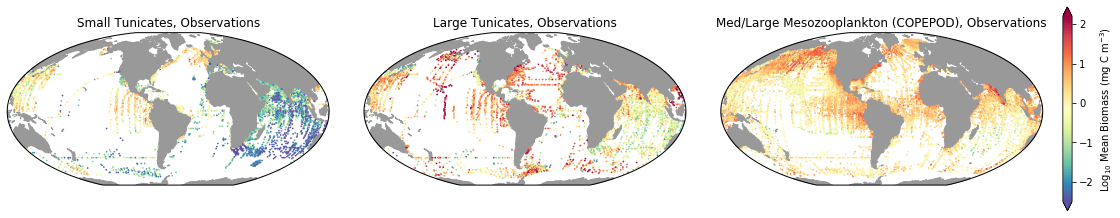

In [19]:
fig=plt.figure(figsize=(20,5))
gs=gridspec.GridSpec(1,3, wspace=0.1, width_ratios=[1,1,1.25])

ax1 = plt.subplot(gs[0,0],projection=ccrs.Mollweide(central_longitude=300.0))
ax1.add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs1=ax1.scatter(dt2.lon, dt2.lat, s=0.5, c=np.log10(dt2.Appendicularians_adj),transform=ccrs.PlateCarree(), vmax=2.2,vmin=-2.5, cmap='Spectral_r')
ax1.set_title('Small Tunicates, Observations')

ax2 = plt.subplot(gs[0,1],projection=ccrs.Mollweide(central_longitude=300.0))
ax2.add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs2=ax2.scatter(dt2.lon, dt2.lat, s=0.5, c=np.log10(dt2.Thaliaceans_adj),transform=ccrs.PlateCarree(), vmax=2.2,vmin=-2.5, cmap='Spectral_r')
ax2.set_title('Large Tunicates, Observations')

ax3 = plt.subplot(gs[0,2],projection=ccrs.Mollweide(central_longitude=300.0))
ax3.add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs3=ax3.scatter(dt2.lon, dt2.lat, s=0.5, c=np.log10(dt2.Copepods),transform=ccrs.PlateCarree(), vmax=2.2,vmin=-2.5, cmap='Spectral_r')
ax3.set_title('Med/Large Mesozooplankton (COPEPOD), Observations')

cb3 = plt.colorbar(cs3, shrink=0.75, extend='both')
cb3.ax.set_ylabel('Log$_{10}$ Mean Biomass (mg C m$^{-3}$)')

plt.tight_layout()
plt.savefig('plots/MeanAnnualBiomass-Obs.png', dpi=300, bbox_inches='tight')

In [20]:
# fig=plt.figure(figsize=(20,6))
# gs=gridspec.GridSpec(1,2, wspace=0.1, width_ratios=[1,1.25])

# ax1 = plt.subplot(gs[0,0],projection=ccrs.Robinson(central_longitude=300.0))
# ax1.add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
# cs1=ax1.scatter(dt2.lon, dt2.lat, s=0.5, c=np.log10(dt2.Appendicularians_adj),transform=ccrs.PlateCarree(), vmax=2.2,vmin=-2.5, cmap='Spectral_r')
# ax1.set_title('Small Tunicates, Observations')

# ax2 = plt.subplot(gs[0,1],projection=ccrs.Robinson(central_longitude=300.0))
# ax2.add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
# cs2=ax2.scatter(dt2.lon, dt2.lat, s=0.5, c=np.log10(dt2.Thaliaceans_adj),transform=ccrs.PlateCarree(), vmax=2.2,vmin=-2.5, cmap='Spectral_r')
# cb2 = plt.colorbar(cs2, shrink=0.75, extend='both')
# cb2.ax.set_ylabel('Log$_{10}$ Mean Biomass (mg C m$^{-3}$)')
# ax2.set_title('Large Tunicates, Observations')
# plt.savefig('plots/'+fig_casename+'_'+pp_dates+'_MeanAnnualBiomass-Obs.png', dpi=300, bbox_inches='tight')

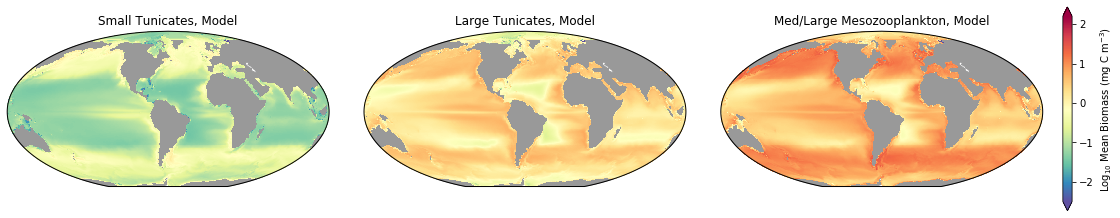

In [21]:
fig=plt.figure(figsize=(20,5))
gs=gridspec.GridSpec(1,3, wspace=0.1, width_ratios=[1,1,1.25])

ax1 = plt.subplot(gs[0,0],projection=ccrs.Mollweide(central_longitude=300.0))
field1=np.log10((do.nsmt_100_gs).mean(dim='time') * cobalt_n_2_c * carbon_molar_mass * 1000 / 100) # mg C m-3
cs1=ax1.pcolormesh(grid.geolon.values, grid.geolat.values, field1, transform=ccrs.PlateCarree(), vmax=2.2,vmin=-2.5, cmap='Spectral_r')
ax1.add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
#cb1 = plt.colorbar(cs1, shrink=0.8)
#cb1.ax.set_ylabel('mg C m$^{-3}$')
ax1.set_title('Small Tunicates, Model')

ax2=plt.subplot(gs[0,1], projection=ccrs.Mollweide(central_longitude=300.0))
field2=np.log10((do.nlgt_100_gs).mean(dim='time') * cobalt_n_2_c * carbon_molar_mass * 1000 / 100) # mg C m-3
cs2=ax2.pcolormesh(grid.geolon.values, grid.geolat.values, field2, transform=ccrs.PlateCarree(), vmax=2.2,vmin=-2.5, cmap='Spectral_r')
ax2.add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
#cb2 = plt.colorbar(cs2, shrink=0.75, extend='min')
#cb2.ax.set_ylabel('Log$_{10}$ Mean Biomass (mg C m$^{-3}$)')
ax2.set_title('Large Tunicates, Model')

ax3 = plt.subplot(gs[0,2],projection=ccrs.Mollweide(central_longitude=300.0))
field3=np.log10((do.nlgz_100_gs+0.5*do.nmdz_100_gs).mean(dim='time') * cobalt_n_2_c * carbon_molar_mass * 1000 / 100) # mg C m-3
cs3=ax3.pcolormesh(grid.geolon.values, grid.geolat.values, field3, transform=ccrs.PlateCarree(), vmax=2.2,vmin=-2.5, cmap='Spectral_r')
ax3.add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax3.set_title('Med/Large Mesozooplankton, Model')

cb3 = plt.colorbar(cs3, shrink=0.75, extend='both')
cb3.ax.set_ylabel('Log$_{10}$ Mean Biomass (mg C m$^{-3}$)')

plt.tight_layout()
plt.savefig('plots/'+fig_casename+'_'+pp_dates+'_MeanAnnualBiomass-Model.png', dpi=300, bbox_inches='tight')

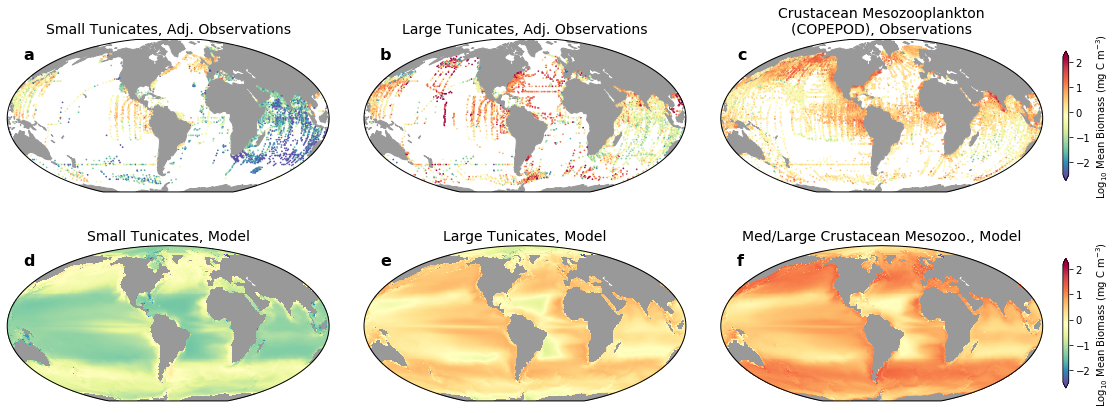

In [22]:
fig=plt.figure(figsize=(20,7))
gs=gridspec.GridSpec(2,3, wspace=0.1, width_ratios=[1,1,1.25])

# obs
ax1 = plt.subplot(gs[0,0],projection=ccrs.Mollweide(central_longitude=300.0))
ax1.add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs1=ax1.scatter(dt2.lon, dt2.lat, s=0.5, c=np.log10(dt2.Appendicularians_adj),transform=ccrs.PlateCarree(), vmax=2.2,vmin=-2.5, cmap='Spectral_r')
ax1.set_title('Small Tunicates, Adj. Observations', fontsize=14)
ax1.text(0.05, 0.95, 'a', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top')

ax2 = plt.subplot(gs[0,1],projection=ccrs.Mollweide(central_longitude=300.0))
ax2.add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs2=ax2.scatter(dt2.lon, dt2.lat, s=0.5, c=np.log10(dt2.Thaliaceans_adj),transform=ccrs.PlateCarree(), vmax=2.2,vmin=-2.5, cmap='Spectral_r')
ax2.set_title('Large Tunicates, Adj. Observations', fontsize=14)
ax2.text(0.05, 0.95, 'b', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='top')

ax3 = plt.subplot(gs[0,2],projection=ccrs.Mollweide(central_longitude=300.0))
ax3.add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs3=ax3.scatter(dt2.lon, dt2.lat, s=0.5, c=np.log10(dt2.Copepods),transform=ccrs.PlateCarree(), vmax=2.2,vmin=-2.5, cmap='Spectral_r')
ax3.set_title('Crustacean Mesozooplankton\n(COPEPOD), Observations', fontsize=14)
ax3.text(0.05, 0.95, 'c', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='top')

cb3 = plt.colorbar(cs3, shrink=0.75, extend='both')
cb3.ax.set_ylabel('Log$_{10}$ Mean Biomass (mg C m$^{-3}$)')

# model
ax4 = plt.subplot(gs[1,0],projection=ccrs.Mollweide(central_longitude=300.0))
field1=np.log10((do.nsmt_100_gs).mean(dim='time') * cobalt_n_2_c * carbon_molar_mass * 1000 / 100) # mg C m-3
cs4=ax4.pcolormesh(grid.geolon.values, grid.geolat.values, field1, transform=ccrs.PlateCarree(), vmax=2.2,vmin=-2.5, cmap='Spectral_r')
ax4.add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax4.set_title('Small Tunicates, Model', fontsize=14)
ax4.text(0.05, 0.95, 'd', transform=ax4.transAxes, fontsize=16, fontweight='bold', va='top')

ax5=plt.subplot(gs[1,1], projection=ccrs.Mollweide(central_longitude=300.0))
field2=np.log10((do.nlgt_100_gs).mean(dim='time') * cobalt_n_2_c * carbon_molar_mass * 1000 / 100) # mg C m-3
cs5=ax5.pcolormesh(grid.geolon.values, grid.geolat.values, field2, transform=ccrs.PlateCarree(), vmax=2.2,vmin=-2.5, cmap='Spectral_r')
ax5.add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax5.set_title('Large Tunicates, Model', fontsize=14)
ax5.text(0.05, 0.95, 'e', transform=ax5.transAxes, fontsize=16, fontweight='bold', va='top')

ax6 = plt.subplot(gs[1,2],projection=ccrs.Mollweide(central_longitude=300.0))
field3=np.log10((do.nlgz_100_gs+0.5*do.nmdz_100_gs).mean(dim='time') * cobalt_n_2_c * carbon_molar_mass * 1000 / 100) # mg C m-3
cs6=ax6.pcolormesh(grid.geolon.values, grid.geolat.values, field3, transform=ccrs.PlateCarree(), vmax=2.2,vmin=-2.5, cmap='Spectral_r')
ax6.add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax6.set_title('Med/Large Crustacean Mesozoo., Model', fontsize=14)
ax6.text(0.05, 0.95, 'f', transform=ax6.transAxes, fontsize=16, fontweight='bold', va='top')

cb6 = plt.colorbar(cs6, shrink=0.75, extend='both')
cb6.ax.set_ylabel('Log$_{10}$ Mean Biomass (mg C m$^{-3}$)')

plt.tight_layout()
plt.savefig('plots/'+fig_casename+'_'+pp_dates+'_MeanAnnualBiomass-Comb.png', dpi=300, bbox_inches='tight')

## Biomass values

In [23]:
dgs = xr.open_dataset('/work/Jessica.Luo/tmp/'+case+'/'+short_casename+'_nsmt_nlgt_growingseason.nc')
dgs

<xarray.Dataset>
Dimensions:      (time: 12, xh: 720, yh: 576)
Coordinates:
  * xh           (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh           (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
Dimensions without coordinates: time
Data variables:
    nmdz_100     (time, yh, xh) float32 ...
    nlgz_100     (time, yh, xh) float32 ...
    nsmt_100     (time, yh, xh) float32 ...
    nlgt_100     (time, yh, xh) float32 ...
    nsmt_100_gs  (time, yh, xh) float32 ...
    nlgt_100_gs  (time, yh, xh) float32 ...
    nmdz_100_gs  (time, yh, xh) float32 ...
    nlgz_100_gs  (time, yh, xh) float32 ...
Attributes:
    filename:          ocean_cobalt_fdet_100.1988-1992.01.nc
    title:             OM4p5_CORE2_IAF_gzCOBALT-013022
    associated_files:  areacello: 19880101.ocean_static.nc
    grid_type:         regular
    grid_tile:         N/A
    comment:           FMS time averaging, version 3.0, precision=double
    history:           Wed Feb 16 10:32:11 2022: ncra -O /archive/Jessica.Luo...
    NCO:               netCDF Operators version 4.8.1 (Homepage = http://nco....

In [24]:
dgs.nsmt_100_gs.isel(time=slice(0,8))

<xarray.DataArray 'nsmt_100_gs' (time: 8, yh: 576, xh: 720)>
[3317760 values with dtype=float32]
Coordinates:
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
Dimensions without coordinates: time

In [25]:
val=(((ds.nsmt_100.mean(dim='time')*grid.areacello).sum()/grid.areacello.sum()) * cobalt_n_2_c * carbon_molar_mass * 1000).mean().values
print('mean small tunicate biomass (top 100 m) - area weighted: ' + str(np.round(val,2)) + ' mg C m-2')

mean small tunicate biomass (top 100 m) - area weighted: 11.44 mg C m-2


In [26]:
val=(((ds.nlgt_100.mean(dim='time')*grid.areacello).sum()/grid.areacello.sum()) * cobalt_n_2_c * carbon_molar_mass * 1000).mean().values
print('mean large tunicate biomass (top 100 m) - area weighted: ' + str(np.round(val,2)) + ' mg C m-2')

mean large tunicate biomass (top 100 m) - area weighted: 161.28 mg C m-2


In [27]:
val=(((ds.nsmt_100.mean(dim='time')*grid.areacello).sum()) * cobalt_n_2_c * carbon_molar_mass).values
print('total small tunicate biomass (top 100 m): ' + str(np.round(val/1e12,2)) + ' Tg C')

total small tunicate biomass (top 100 m): 5.78 Tg C


In [28]:
val=(((ds.nlgt_100.mean(dim='time')*grid.areacello).sum()) * cobalt_n_2_c * carbon_molar_mass).values
print('total large tunicate biomass (top 100 m): ' + str(np.round(val/1e12,2)) + ' Tg C')

total large tunicate biomass (top 100 m): 81.54 Tg C


In [29]:
val=((((ds.nlgz_100 + 0.5*ds.nmdz_100).mean(dim='time')*grid.areacello).sum()) * cobalt_n_2_c * carbon_molar_mass).values
print('total md/lg mesozooplankton biomass (top 100 m): ' + str(np.round(val/1e12,2)) + ' Tg C')

total md/lg mesozooplankton biomass (top 100 m): 204.97 Tg C


In [30]:
val=(((dgs.nsmt_100_gs.isel(time=slice(0,8)).mean(dim='time')*grid.areacello).sum()) * cobalt_n_2_c * carbon_molar_mass).values
print('Growing Season small tunicate biomass (top 100 m): ' + str(np.round(val/1e12,2)) + ' Tg C')

Growing Season small tunicate biomass (top 100 m): 7.4 Tg C


In [31]:
val=(((dgs.nlgt_100_gs.isel(time=slice(0,8)).mean(dim='time')*grid.areacello).sum()) * cobalt_n_2_c * carbon_molar_mass).values
print('Growing Season large tunicate biomass (top 100 m): ' + str(np.round(val/1e12,2)) + ' Tg C')

Growing Season large tunicate biomass (top 100 m): 82.01 Tg C


# Model annual means, Separated by Biome

In [32]:
# load biomes
biomes = xr.open_dataset('biomes/'+short_casename+'_'+pp_dates+'_biomes.nc')

## Thaliaceans (units of mg C m-3)

In [33]:
Thal_global_model=(((ds.nlgt_100.mean(dim='time')*grid.areacello).sum()/grid.areacello.sum()) * \
     cobalt_n_2_c * carbon_molar_mass * 1000)/100
Thal_global_model_mean = Thal_global_model.mean().values
Thal_global_model_std = Thal_global_model.std().values
print(np.round(Thal_global_model_mean,3))

1.613


In [34]:
Thal_LC_model=(((ds.nlgt_100.mean(dim='time')*grid.areacello).where(biomes.biomes==1).sum()/grid.areacello.where(biomes.biomes==1).sum()) * \
     cobalt_n_2_c * carbon_molar_mass * 1000)/100
Thal_LC_model_mean = Thal_LC_model.mean().values
Thal_LC_model_std = Thal_LC_model.std().values
print(np.round(Thal_LC_model_mean,3))

1.385


In [35]:
Thal_HCPS_model=(((ds.nlgt_100.mean(dim='time')*grid.areacello).where(biomes.biomes==3).sum()/grid.areacello.where(biomes.biomes==3).sum()) * \
     cobalt_n_2_c * carbon_molar_mass * 1000)/100
Thal_HCPS_model_mean = Thal_HCPS_model.mean().values
Thal_HCPS_model_std = Thal_HCPS_model.std().values
print(np.round(Thal_HCPS_model_mean,3))

3.178


In [36]:
Thal_HCSS_model=(((ds.nlgt_100.mean(dim='time')*grid.areacello).where(biomes.biomes==2).sum()/grid.areacello.where(biomes.biomes==2).sum()) * \
     cobalt_n_2_c * carbon_molar_mass * 1000)/100
Thal_HCSS_model_mean = Thal_HCSS_model.mean().values
Thal_HCSS_model_std = Thal_HCSS_model.std().values
print(np.round(Thal_HCSS_model_mean,3))

2.421


## Appendicularians (units of mg C m-3)

In [37]:
Apps_global_model=(((ds.nsmt_100.mean(dim='time')*grid.areacello).sum()/grid.areacello.sum()) * \
     cobalt_n_2_c * carbon_molar_mass * 1000)/100
Apps_global_model_mean = Apps_global_model.mean().values
Apps_global_model_std = Apps_global_model.std().values
print(np.round(Apps_global_model_mean,3))

0.114


In [38]:
Apps_LC_model=(((ds.nsmt_100.mean(dim='time')*grid.areacello).where(biomes.biomes==1).sum()/grid.areacello.where(biomes.biomes==1).sum()) * \
     cobalt_n_2_c * carbon_molar_mass * 1000)/100
Apps_LC_model_mean = Apps_LC_model.mean().values
Apps_LC_model_std = Apps_LC_model.std().values
print(np.round(Apps_LC_model_mean,4))

0.0586


In [39]:
Apps_HCPS_model=(((ds.nsmt_100.mean(dim='time')*grid.areacello).where(biomes.biomes==3).sum()/grid.areacello.where(biomes.biomes==3).sum()) * \
     cobalt_n_2_c * carbon_molar_mass * 1000)/100
Apps_HCPS_model_mean = Apps_HCPS_model.mean().values
Apps_HCPS_model_std = Apps_HCPS_model.std().values
print(np.round(Apps_HCPS_model_mean,3))

0.158


In [40]:
Apps_HCSS_model=(((ds.nsmt_100.mean(dim='time')*grid.areacello).where(biomes.biomes==2).sum()/grid.areacello.where(biomes.biomes==2).sum()) * \
     cobalt_n_2_c * carbon_molar_mass * 1000)/100
Apps_HCSS_model_mean = Apps_HCSS_model.mean().values
Apps_HCSS_model_std = Apps_HCSS_model.std().values
print(np.round(Apps_HCSS_model_mean,3))

0.275


## Copepods

In [41]:
Cope_global_model=((((ds.nlgz_100 + 0.5*ds.nmdz_100).mean(dim='time')*grid.areacello).sum()/grid.areacello.sum()) * \
     cobalt_n_2_c * carbon_molar_mass * 1000)/100
Cope_global_model_mean = Cope_global_model.mean().values
Cope_global_model_std = Cope_global_model.std().values
print(np.round(Cope_global_model_mean,3))

4.054


In [42]:
Cope_LC_model=((((ds.nlgz_100 + 0.5*ds.nmdz_100).mean(dim='time')*grid.areacello).where(biomes.biomes==1).sum()/grid.areacello.where(biomes.biomes==1).sum()) * \
     cobalt_n_2_c * carbon_molar_mass * 1000)/100
Cope_LC_model_mean = Cope_LC_model.mean().values
Cope_LC_model_std = Cope_LC_model.std().values
print(np.round(Cope_LC_model_mean,3))

2.571


In [43]:
Cope_HCPS_model=((((ds.nlgz_100 + 0.5*ds.nmdz_100).mean(dim='time')*grid.areacello).where(biomes.biomes==3).sum()/grid.areacello.where(biomes.biomes==3).sum()) * \
     cobalt_n_2_c * carbon_molar_mass * 1000)/100
Cope_HCPS_model_mean = Cope_HCPS_model.mean().values
Cope_HCPS_model_std = Cope_HCPS_model.std().values
print(np.round(Cope_HCPS_model_mean,3))

6.598


In [44]:
Cope_HCSS_model=((((ds.nlgz_100 + 0.5*ds.nmdz_100).mean(dim='time')*grid.areacello).where(biomes.biomes==2).sum()/grid.areacello.where(biomes.biomes==2).sum()) * \
     cobalt_n_2_c * carbon_molar_mass * 1000)/100
Cope_HCSS_model_mean = Cope_HCSS_model.mean().values
Cope_HCSS_model_std = Cope_HCSS_model.std().values
print(np.round(Cope_HCSS_model_mean,3))

8.322
